<a href="https://colab.research.google.com/github/santiagoviteri01/mmia_nlp_2023_2024/blob/main/taller_4_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import re
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.nn as nn
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from collections import Counter


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import re

# Load the text
def load_text(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    return text

# Prepare a small portion of text
file_path = '/content/drive/MyDrive/cap1.txt'
text = load_text(file_path)

In [ ]:
text

'Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarlas con el dedo. Todos los años, por el mes de marzo, una familia de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de barba montaraz y manos de gorrión, que se presentó con el nombre de Melquíades, hizo una truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios alquimistas de Macedonia. Fue de casa en casa arrastrando dos lingote

In [5]:
!pip install nltk # install nltk
import nltk

In [6]:
nltk.download('stopwords')
ss = SnowballStemmer('spanish')
sw = stopwords.words('spanish')
tokenizer = RegexpTokenizer(r'\w+')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#!ls -lh ./workspace/mmia-6021-fall24/guides/data/

In [ ]:
#!head -c 1000 './workspace/mmia-6021-fall24/guides/data/gabriel_garcia_marquez_cien_annos_soledad.txt'

head: cannot open './workspace/mmia-6021-fall24/guides/data/gabriel_garcia_marquez_cien_annos_soledad.txt' for reading: No such file or directory


In [ ]:
#text = open('./workspace/mmia-6021-fall24/guides/data/gabriel_garcia_marquez_cien_annos_soledad.txt', 'r').read().lower()
# text = open('./workspace/mmia-6021-fall24/guides/data/cap1.txt', 'r').read().lower()

In [7]:
def split_tokens(text):
    tokens = tokenizer.tokenize(text)
    tokens = [w for w in tokens if w not in sw]
    #tokens = [ss.stem(w) for w in tokens if w not in sw]
    return tokens


In [8]:
tokens = split_tokens(text)

In [9]:
tokens[:-20]

['Muchos',
 'años',
 'después',
 'frente',
 'pelotón',
 'fusilamiento',
 'coronel',
 'Aureliano',
 'Buendía',
 'recordar',
 'aquella',
 'tarde',
 'remota',
 'padre',
 'llevó',
 'conocer',
 'hielo',
 'Macondo',
 'entonces',
 'aldea',
 'veinte',
 'casas',
 'barro',
 'cañabrava',
 'construidas',
 'orilla',
 'río',
 'aguas',
 'diáfanas',
 'precipitaban',
 'lecho',
 'piedras',
 'pulidas',
 'blancas',
 'enormes',
 'huevos',
 'prehistóricos',
 'El',
 'mundo',
 'tan',
 'reciente',
 'muchas',
 'cosas',
 'carecían',
 'nombre',
 'mencionarlas',
 'señalarlas',
 'dedo',
 'Todos',
 'años',
 'mes',
 'marzo',
 'familia',
 'gitanos',
 'desarrapados',
 'plantaba',
 'carpa',
 'cerca',
 'aldea',
 'grande',
 'alboroto',
 'pitos',
 'timbales',
 'daban',
 'conocer',
 'nuevos',
 'inventos',
 'Primero',
 'llevaron',
 'imán',
 'Un',
 'gitano',
 'corpulento',
 'barba',
 'montaraz',
 'manos',
 'gorrión',
 'presentó',
 'nombre',
 'Melquíades',
 'hizo',
 'truculenta',
 'demostración',
 'pública',
 'mismo',
 'llamab

In [10]:
counts = Counter(tokens)

In [10]:
counts

Counter({'Muchos': 2,
         'años': 13,
         'después': 2,
         'frente': 2,
         'pelotón': 2,
         'fusilamiento': 2,
         'coronel': 3,
         'Aureliano': 8,
         'Buendía': 40,
         'recordar': 2,
         'aquella': 11,
         'tarde': 6,
         'remota': 1,
         'padre': 8,
         'llevó': 4,
         'conocer': 5,
         'hielo': 3,
         'Macondo': 13,
         'entonces': 10,
         'aldea': 15,
         'veinte': 1,
         'casas': 2,
         'barro': 2,
         'cañabrava': 1,
         'construidas': 1,
         'orilla': 1,
         'río': 5,
         'aguas': 1,
         'diáfanas': 1,
         'precipitaban': 1,
         'lecho': 1,
         'piedras': 3,
         'pulidas': 1,
         'blancas': 1,
         'enormes': 1,
         'huevos': 2,
         'prehistóricos': 1,
         'El': 11,
         'mundo': 11,
         'tan': 10,
         'reciente': 1,
         'muchas': 1,
         'cosas': 9,
         'carecían'

In [11]:
counts_more_than_1 = {k:v for k,v in counts.items() if v > 1}

In [12]:
vocab = list(counts_more_than_1.keys())
itot = dict(enumerate(vocab))
ttoi = {v:k for k,v in itot.items()}

In [13]:
tokens_more_than_1 = [w for w in tokens if w in vocab]

### Let's prepare the window for Word2VecCNN

In [14]:
def window(tokens, win=2):
    output = []
    for i, w in enumerate(tokens):
        target = ttoi[w]
        window = [tokens[i+j] for j in range(-win, win+1,1)
                  if (i+j >= 0) & (i+j < len(tokens)) & (j != 0)]
       # print(window)
        output += [(target, ttoi[j]) for j in window]
    return output

In [15]:
data_windowed = window(tokens_more_than_1, win=4)

In [17]:
data_windowed

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 12),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9),
 (10, 11),
 (10, 12),
 (10, 13),
 (10, 14),
 (11, 7),
 (11, 8),
 (11, 9),
 (11, 10),
 (11, 12),
 (11, 13),
 (11, 14),
 (11, 15),
 (12, 8),
 (12, 9),
 (12, 10),
 (12, 11),
 (12, 13),
 (12, 14),
 (12, 15),
 (12, 16),
 (13, 9),
 (13, 10),
 (13, 11),
 (13, 12),
 (13, 14),
 (13, 15),
 (13, 16),
 (13, 17),
 (14, 10),
 (14, 1

In [18]:
class text_dataset(Dataset):
    def __init__(self, data_windowed, vocab_size):
        self.data = data_windowed
        self.vocab_size = vocab_size

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x0, y = self.data[idx]
        # Ensure that x0 is a sequence and not a single value
        if not isinstance(x0, (list, tuple)):
            x0 = [x0]  # Wrap x0 in a list if it's a single value
        return torch.tensor(x0), torch.tensor(y)


In [19]:
dataset = text_dataset(data_windowed, len(vocab))

### Building the network

In [20]:
class Word2VecCNN(nn.Module):
    def __init__(self, vocab_size, embedding_size, kernel_size, num_filters):
        super(Word2VecCNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embedding_size)
        self.conv1d = nn.Conv1d(in_channels=embedding_size,
                                out_channels=num_filters,
                                kernel_size=kernel_size, padding=1)

        self.kernel_size = kernel_size # Define self.kernel_size before calling _get_conv1d_output_length
        self.num_filters = num_filters

        # Calculate the output size of the convolutional layer
        output_size = self._get_conv1d_output_length(2) * num_filters

        # Adjust the input size of the linear layer to match the output of the convolutional layer
        self.expand = nn.Linear(output_size, vocab_size, bias=False)

    def _get_conv1d_output_length(self, input_length):
        # Compute output length of Conv1d layer
        return (input_length - self.kernel_size + 2 * 1) // 1

    def forward(self, input):
        # Convert input to embeddings
        hidden = self.embed(input)

        # Check if hidden is 2D and add dimension if necessary
        if hidden.dim() == 2:
            hidden = hidden.unsqueeze(1)  # Add dimension at position 1

        # Permute the hidden tensor for Conv1d
        hidden = hidden.permute(0,2,1)  # (batch_size, embedding_size, seq_len)

        # Apply the convolutional layer
        conv_out = self.conv1d(hidden)

        # Flatten the conv_out tensor using reshape
        conv_out = conv_out.reshape(conv_out.size(0), -1) # Flatten to 2 dimensions

        # Apply linear layer
        logits = self.expand(conv_out)

        return logits

vocab_size=len(vocab)
embedding_size = 10  # Embedding size
kernel_size = 2  # Kernel size
num_filters = 10  # number of filters

# Create the model
model = Word2VecCNN(vocab_size, embedding_size, kernel_size, num_filters)
print(model)

# Define loss function and optimizer
LR = 3e-3
EPOCHS = 100
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

from tqdm import tqdm

dataloader = DataLoader(dataset, batch_size=64, shuffle=True)  # Use a reasonable batch size

# Training loop
progress_bar = tqdm(range(EPOCHS * len(dataloader)))
running_loss = []

for epoch in range(EPOCHS):
    epoch_loss = 0
    for center, context in dataloader:
        optimizer.zero_grad()
        logits = model(input=context)

        # Reshape the center tensor to be 1D
        loss = loss_fn(logits, center.squeeze(1))

        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        progress_bar.update()

    epoch_loss /= len(dataloader)
    running_loss.append(epoch_loss)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}")

Word2VecCNN(
  (embed): Embedding(487, 10)
  (conv1d): Conv1d(10, 10, kernel_size=(2,), stride=(1,), padding=(1,))
  (expand): Linear(in_features=20, out_features=487, bias=False)
)


  1%|          | 224/21300 [00:03<04:41, 74.80it/s]

Epoch 1/100, Loss: 6.0656


  2%|▏         | 452/21300 [00:05<02:30, 138.56it/s]

Epoch 2/100, Loss: 5.8726


  3%|▎         | 660/21300 [00:07<02:53, 118.73it/s]

Epoch 3/100, Loss: 5.8182


  4%|▍         | 865/21300 [00:09<02:29, 136.77it/s]

Epoch 4/100, Loss: 5.7482


  5%|▌         | 1092/21300 [00:11<02:13, 151.74it/s]

Epoch 5/100, Loss: 5.6737


  6%|▌         | 1302/21300 [00:12<01:50, 181.13it/s]

Epoch 6/100, Loss: 5.5999


  7%|▋         | 1530/21300 [00:13<01:09, 282.57it/s]

Epoch 7/100, Loss: 5.5308


  8%|▊         | 1742/21300 [00:14<00:56, 344.22it/s]

Epoch 8/100, Loss: 5.4678


  9%|▉         | 1962/21300 [00:14<00:54, 354.80it/s]

Epoch 9/100, Loss: 5.4111


 10%|█         | 2177/21300 [00:15<00:55, 342.98it/s]

Epoch 10/100, Loss: 5.3601


 11%|█         | 2383/21300 [00:16<01:19, 239.38it/s]

Epoch 11/100, Loss: 5.3137


 12%|█▏        | 2590/21300 [00:17<01:20, 231.73it/s]

Epoch 12/100, Loss: 5.2709


 13%|█▎        | 2818/21300 [00:18<01:15, 243.68it/s]

Epoch 13/100, Loss: 5.2344


 14%|█▍        | 3014/21300 [00:18<01:18, 232.60it/s]

Epoch 14/100, Loss: 5.1996


 15%|█▌        | 3265/21300 [00:20<01:07, 266.99it/s]

Epoch 15/100, Loss: 5.1714


 16%|█▌        | 3446/21300 [00:21<00:57, 311.92it/s]

Epoch 16/100, Loss: 5.1423


 17%|█▋        | 3665/21300 [00:21<00:50, 351.02it/s]

Epoch 17/100, Loss: 5.1187


 18%|█▊        | 3888/21300 [00:22<00:49, 353.44it/s]

Epoch 18/100, Loss: 5.0969


 19%|█▉        | 4105/21300 [00:23<00:48, 352.21it/s]

Epoch 19/100, Loss: 5.0770


 20%|██        | 4320/21300 [00:23<00:48, 349.86it/s]

Epoch 20/100, Loss: 5.0594


 21%|██        | 4504/21300 [00:24<00:47, 351.43it/s]

Epoch 21/100, Loss: 5.0441


 22%|██▏       | 4723/21300 [00:24<00:46, 353.49it/s]

Epoch 22/100, Loss: 5.0295


 23%|██▎       | 4940/21300 [00:25<00:47, 342.05it/s]

Epoch 23/100, Loss: 5.0150


 24%|██▍       | 5160/21300 [00:26<00:44, 359.21it/s]

Epoch 24/100, Loss: 5.0036


 25%|██▌       | 5377/21300 [00:26<00:44, 354.97it/s]

Epoch 25/100, Loss: 4.9928


 26%|██▋       | 5595/21300 [00:27<00:44, 349.50it/s]

Epoch 26/100, Loss: 4.9820


 27%|██▋       | 5814/21300 [00:27<00:43, 355.04it/s]

Epoch 27/100, Loss: 4.9715


 28%|██▊       | 5995/21300 [00:28<00:44, 341.36it/s]

Epoch 28/100, Loss: 4.9626


 29%|██▉       | 6203/21300 [00:29<01:32, 163.00it/s]

Epoch 29/100, Loss: 4.9559


 30%|██▉       | 6389/21300 [00:32<03:46, 65.97it/s]

Epoch 30/100, Loss: 4.9481


 31%|███       | 6622/21300 [00:35<02:52, 85.22it/s]

Epoch 31/100, Loss: 4.9399


 32%|███▏      | 6850/21300 [00:36<01:16, 188.28it/s]

Epoch 32/100, Loss: 4.9342


 33%|███▎      | 7086/21300 [00:37<00:44, 316.89it/s]

Epoch 33/100, Loss: 4.9270


 34%|███▍      | 7297/21300 [00:38<00:41, 336.22it/s]

Epoch 34/100, Loss: 4.9199


 35%|███▌      | 7517/21300 [00:38<00:39, 353.18it/s]

Epoch 35/100, Loss: 4.9152


 36%|███▋      | 7733/21300 [00:39<00:38, 348.15it/s]

Epoch 36/100, Loss: 4.9080


 37%|███▋      | 7949/21300 [00:40<00:38, 344.45it/s]

Epoch 37/100, Loss: 4.9039


 38%|███▊      | 8131/21300 [00:40<00:37, 355.28it/s]

Epoch 38/100, Loss: 4.8981


 39%|███▉      | 8351/21300 [00:41<00:37, 347.46it/s]

Epoch 39/100, Loss: 4.8936


 40%|████      | 8568/21300 [00:41<00:35, 359.50it/s]

Epoch 40/100, Loss: 4.8899


 41%|████      | 8785/21300 [00:42<00:35, 350.10it/s]

Epoch 41/100, Loss: 4.8847


 42%|████▏     | 9006/21300 [00:43<00:35, 346.85it/s]

Epoch 42/100, Loss: 4.8816


 43%|████▎     | 9222/21300 [00:43<00:34, 348.21it/s]

Epoch 43/100, Loss: 4.8766


 44%|████▍     | 9438/21300 [00:44<00:34, 342.52it/s]

Epoch 44/100, Loss: 4.8734


 45%|████▌     | 9655/21300 [00:44<00:32, 358.34it/s]

Epoch 45/100, Loss: 4.8707


 46%|████▌     | 9838/21300 [00:45<00:32, 357.17it/s]

Epoch 46/100, Loss: 4.8674


 47%|████▋     | 10035/21300 [00:46<00:43, 257.07it/s]

Epoch 47/100, Loss: 4.8636


 48%|████▊     | 10265/21300 [00:47<00:48, 227.31it/s]

Epoch 48/100, Loss: 4.8613


 49%|████▉     | 10469/21300 [00:48<00:43, 247.64it/s]

Epoch 49/100, Loss: 4.8577


 50%|█████     | 10690/21300 [00:48<00:45, 231.84it/s]

Epoch 50/100, Loss: 4.8562


 51%|█████     | 10900/21300 [00:49<00:47, 220.85it/s]

Epoch 51/100, Loss: 4.8523


 52%|█████▏    | 11137/21300 [00:50<00:30, 328.80it/s]

Epoch 52/100, Loss: 4.8513


 53%|█████▎    | 11321/21300 [00:51<00:28, 355.34it/s]

Epoch 53/100, Loss: 4.8463


 54%|█████▍    | 11574/21300 [00:51<00:27, 352.16it/s]

Epoch 54/100, Loss: 4.8461


 55%|█████▌    | 11757/21300 [00:52<00:26, 354.27it/s]

Epoch 55/100, Loss: 4.8436


 56%|█████▌    | 11975/21300 [00:53<00:26, 354.18it/s]

Epoch 56/100, Loss: 4.8405


 57%|█████▋    | 12191/21300 [00:53<00:26, 347.29it/s]

Epoch 57/100, Loss: 4.8391


 58%|█████▊    | 12407/21300 [00:54<00:25, 345.36it/s]

Epoch 58/100, Loss: 4.8360


 59%|█████▉    | 12626/21300 [00:54<00:24, 355.55it/s]

Epoch 59/100, Loss: 4.8350


 60%|██████    | 12844/21300 [00:55<00:23, 356.39it/s]

Epoch 60/100, Loss: 4.8336


 61%|██████▏   | 13062/21300 [00:56<00:23, 357.06it/s]

Epoch 61/100, Loss: 4.8301


 62%|██████▏   | 13245/21300 [00:56<00:23, 346.04it/s]

Epoch 62/100, Loss: 4.8298


 63%|██████▎   | 13466/21300 [00:57<00:22, 351.18it/s]

Epoch 63/100, Loss: 4.8287


 64%|██████▍   | 13684/21300 [00:57<00:21, 351.38it/s]

Epoch 64/100, Loss: 4.8264


 65%|██████▌   | 13900/21300 [00:58<00:21, 349.05it/s]

Epoch 65/100, Loss: 4.8246


 66%|██████▋   | 14113/21300 [00:59<00:20, 351.37it/s]

Epoch 66/100, Loss: 4.8232


 67%|██████▋   | 14330/21300 [00:59<00:20, 340.99it/s]

Epoch 67/100, Loss: 4.8204


 68%|██████▊   | 14527/21300 [01:00<00:25, 265.44it/s]

Epoch 68/100, Loss: 4.8190


 69%|██████▉   | 14740/21300 [01:01<00:26, 244.87it/s]

Epoch 69/100, Loss: 4.8183


 70%|███████   | 14944/21300 [01:02<00:25, 245.66it/s]

Epoch 70/100, Loss: 4.8173


 71%|███████   | 15152/21300 [01:03<00:25, 239.72it/s]

Epoch 71/100, Loss: 4.8158


 72%|███████▏  | 15371/21300 [01:03<00:25, 234.29it/s]

Epoch 72/100, Loss: 4.8145


 73%|███████▎  | 15598/21300 [01:04<00:18, 307.92it/s]

Epoch 73/100, Loss: 4.8127


 74%|███████▍  | 15813/21300 [01:05<00:15, 352.08it/s]

Epoch 74/100, Loss: 4.8102


 75%|███████▌  | 16030/21300 [01:06<00:15, 350.26it/s]

Epoch 75/100, Loss: 4.8104


 76%|███████▋  | 16249/21300 [01:06<00:14, 354.44it/s]

Epoch 76/100, Loss: 4.8088


 77%|███████▋  | 16467/21300 [01:07<00:14, 343.49it/s]

Epoch 77/100, Loss: 4.8077


 78%|███████▊  | 16685/21300 [01:07<00:13, 350.91it/s]

Epoch 78/100, Loss: 4.8066


 79%|███████▉  | 16864/21300 [01:08<00:12, 341.48it/s]

Epoch 79/100, Loss: 4.8054


 80%|████████  | 17078/21300 [01:09<00:12, 350.41it/s]

Epoch 80/100, Loss: 4.8045


 81%|████████▏ | 17322/21300 [01:09<00:11, 339.01it/s]

Epoch 81/100, Loss: 4.8026


 82%|████████▏ | 17500/21300 [01:10<00:11, 331.61it/s]

Epoch 82/100, Loss: 4.8020


 83%|████████▎ | 17718/21300 [01:10<00:10, 352.21it/s]

Epoch 83/100, Loss: 4.8006


 84%|████████▍ | 17934/21300 [01:11<00:09, 349.79it/s]

Epoch 84/100, Loss: 4.8000


 85%|████████▌ | 18152/21300 [01:12<00:08, 356.03it/s]

Epoch 85/100, Loss: 4.7994


 86%|████████▌ | 18371/21300 [01:12<00:08, 353.14it/s]

Epoch 86/100, Loss: 4.7993


 87%|████████▋ | 18589/21300 [01:13<00:07, 345.91it/s]

Epoch 87/100, Loss: 4.7973


 88%|████████▊ | 18805/21300 [01:14<00:06, 356.75it/s]

Epoch 88/100, Loss: 4.7967


 89%|████████▉ | 18985/21300 [01:14<00:07, 319.09it/s]

Epoch 89/100, Loss: 4.7957


 90%|█████████ | 19204/21300 [01:15<00:08, 240.81it/s]

Epoch 90/100, Loss: 4.7938


 91%|█████████ | 19423/21300 [01:16<00:07, 239.30it/s]

Epoch 91/100, Loss: 4.7953


 92%|█████████▏| 19625/21300 [01:17<00:07, 234.54it/s]

Epoch 92/100, Loss: 4.7929


 93%|█████████▎| 19832/21300 [01:18<00:07, 204.13it/s]

Epoch 93/100, Loss: 4.7921


 94%|█████████▍| 20065/21300 [01:19<00:04, 285.19it/s]

Epoch 94/100, Loss: 4.7916


 95%|█████████▌| 20276/21300 [01:19<00:03, 339.18it/s]

Epoch 95/100, Loss: 4.7901


 96%|█████████▌| 20491/21300 [01:20<00:02, 352.97it/s]

Epoch 96/100, Loss: 4.7899


 97%|█████████▋| 20707/21300 [01:21<00:01, 349.39it/s]

Epoch 97/100, Loss: 4.7888


 98%|█████████▊| 20923/21300 [01:21<00:01, 331.42it/s]

Epoch 98/100, Loss: 4.7887


 99%|█████████▉| 21138/21300 [01:22<00:00, 341.59it/s]

Epoch 99/100, Loss: 4.7868


100%|█████████▉| 21282/21300 [01:22<00:00, 348.73it/s]

Epoch 100/100, Loss: 4.7872


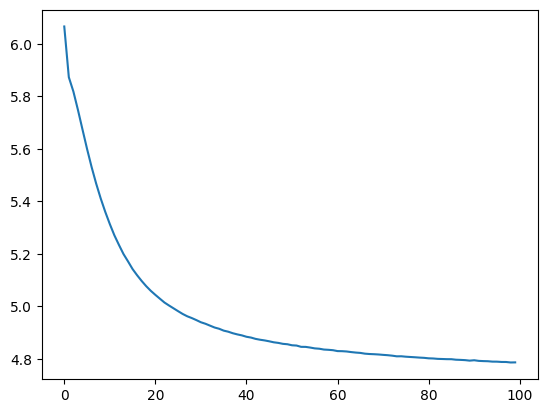

In [21]:
import matplotlib.pyplot as plt
plt.plot(running_loss)

In [22]:
from scipy.spatial import distance
import numpy as np


In [23]:
wordvecs = model.expand.weight.cpu().detach().numpy()
wordvecs[0]

array([-0.03182739, -0.19041316, -0.06656986,  0.34494627,  1.4342452 ,
       -0.14171308,  1.0965886 ,  0.64856774, -0.547748  , -0.83988035,
       -0.747104  ,  0.16870458,  0.16907609,  0.7489911 , -0.6506867 ,
       -0.07596089,  0.54714936,  0.46206418,  0.32192573, -0.08585812],
      dtype=float32)

In [25]:
itot = {i: word for i, word in enumerate(vocab)}
ttoi = {word: i for i, word in enumerate(vocab)}
def get_distance_matrix(wordvecs, metric):
    dist_matrix = distance.squareform(distance.pdist(wordvecs, metric))
    return dist_matrix

# n * (n-1) / 2
def get_k_similar_words(word, dist_matrix, itot, ttoi, k=10): # Added itot and ttoi as arguments
    idx = ttoi[word]
    dists = dist_matrix[idx]
    ind = np.argpartition(dists, k)[:k+1]
    ind = ind[np.argsort(dists[ind])][1:]
    out = [(i, itot[i], dists[i]) for i in ind]
    return out

dmat = get_distance_matrix(wordvecs, 'cosine')
tokens_test = ["Aureliano",'años', 'coronel', 'casa', 'pueblo', 'Macondo',"Úrsula"]

# Assuming 'itot' and 'ttoi' are defined elsewhere in the code,
# pass them as arguments to the function
for word in tokens_test:
    print(word, [t[1] for t in get_k_similar_words(word, dmat, itot, ttoi, k=10)], "\n")

Aureliano ['tarde', 'primer', 'sierra', 'coronel', 'años', 'fusilamiento', 'pelotón', 'edad', 'fundación', 'después'] 

años ['entonces', 'aquella', 'niños', 'Macondo', 'Aureliano', 'Los', 'padre', 'Buendía', 'tarde', 'gitanos'] 

coronel ['fusilamiento', 'pelotón', 'después', 'Muchos', 'Sólo', 'recordar', 'sierra', 'empresa', 'Aureliano', 'primer'] 

casa ['En', 'mundo', 'Úrsula', 'vez', 'dos', 'sino', 'ver', 'tan', 'gitanos', 'punto'] 

pueblo ['posibilidad', 'desmontar', 'astrolabio', 'norte', 'puerta', 'decir', 'mismos', 'Toda', 'regresar', 'herramientas'] 

Macondo ['entonces', 'Era', 'años', 'aldea', 'Buendía', 'Arcadio', 'José', 'todas', 'ser', 'hombre'] 

Úrsula ['Pero', 'punto', 'aquella', 'En', 'mujer', 'Melquíades', 'vez', 'cosas', 'toda', 'José'] 



## Conclusion


EL modelo Word2VecCNN, emplea una red neuronal convolucional que integra embeddings de palabras de tamaño 10 con una capa de convolución 1D. El proposito de esta red neuronal es que esta diseñada para capturar y modelar las relaciones contextuales entre palabras dentro de secuencias textuales.

El proceso de entrenamiento del modelo utiliza una función de pérdida de entropía cruzada en combinación con el optimizador AdamW, durante un total de 100 épocas. A lo largo de este proceso, se observa una disminución continua y progresiva de la pérdida, lo que indica que está efectivamente aprendiendo a representar las relaciones entre las palabras. Al final del entrenamiento, la pérdida tiende a estabilizarse alrededor del valor de 4.78.

Finalmente el modelo encuentra de manera adecuada palabras similares mediante el cálculo de distancias entre vectores utilizando la matriz de distancias. Por ejemplo Aureliano y de Coronel comparten palabras similares ya que estas dos vienen a ser muy cercanas dentro del texto. (Coronel Aureliano Buendia)
